In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [60]:
# import data
banking_marketing_train_original = pd.read_csv('banking_marketing_train.csv', delimiter=';', quotechar='"')
banking_marketing_test_original = pd.read_csv('banking_marketing_test.csv', delimiter=';', quotechar='"')

In [75]:
# import data
banking_marketing_train = pd.read_csv('banking_marketing_train.csv', delimiter=';', quotechar='"')
banking_marketing_test = pd.read_csv('banking_marketing_test.csv', delimiter=';', quotechar='"')

data cleaning

In [30]:
banking_marketing_train.info()
banking_marketing_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [31]:
# check for missing values
banking_marketing_train.isna().sum()

# no na

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# check for duplicate rows
banking_marketing_train.duplicated().sum()

# no duplicate rows

0

In [32]:
banking_marketing_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [84]:
# convert columns with number to numeric
numeric_columns = ['age','balance','day','duration','campaign','pdays','previous']
for col in numeric_columns:
    print(f"Category counts for column '{col}':")
    print(banking_marketing_train[col].value_counts())
    print("\n")

Category counts for column 'age':
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64


Category counts for column 'balance':
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64


Category counts for column 'day':
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64


Category counts for column 'duration':
124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1


In [34]:
banking_marketing_train.select_dtypes(include=['number'])

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


encoding

In [36]:
banking_marketing_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# feature engineering - encoding

In [76]:
banking_marketing_train_encoded = banking_marketing_train

In [77]:
# yes/no
binary_columns = ['default','housing','loan','y']
for col in binary_columns:
    print(f"Category counts for column '{col}':")
    print(banking_marketing_train[col].value_counts())
    print("\n")
for column in binary_columns:
    banking_marketing_train_encoded[column] = banking_marketing_train[column].map({'yes': 1, 'no': 0})


Category counts for column 'default':
no     44396
yes      815
Name: default, dtype: int64


Category counts for column 'housing':
yes    25130
no     20081
Name: housing, dtype: int64


Category counts for column 'loan':
no     37967
yes     7244
Name: loan, dtype: int64


Category counts for column 'y':
no     39922
yes     5289
Name: y, dtype: int64




In [78]:
# nominal
nominal_columns = ['job','marital','contact','poutcome']
for col in nominal_columns:
    print(f"Category counts for column '{col}':")
    print(banking_marketing_train[col].value_counts())
    print("\n")
banking_marketing_train_encoded = pd.get_dummies(banking_marketing_train, columns=nominal_columns)

Category counts for column 'job':
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


Category counts for column 'marital':
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


Category counts for column 'contact':
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


Category counts for column 'poutcome':
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64




In [ ]:
# create a special column for poutcome, success = 1, failure = 0, filter other columns
special_train = banking_marketing_train[banking_marketing_train['poutcome']]

In [79]:
# ordinal
ordinal_columns = ['education','month']
encoder = LabelEncoder()
for col in ordinal_columns:
    print(f"Category counts for column '{col}':")
    print(banking_marketing_train[col].value_counts())
    print("\n")
    banking_marketing_train_encoded[col] = encoder.fit_transform(banking_marketing_train[col])


Category counts for column 'education':
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


Category counts for column 'month':
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64




In [81]:
banking_marketing_train_encoded.head()
banking_marketing_train_encoded.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

data visualisation

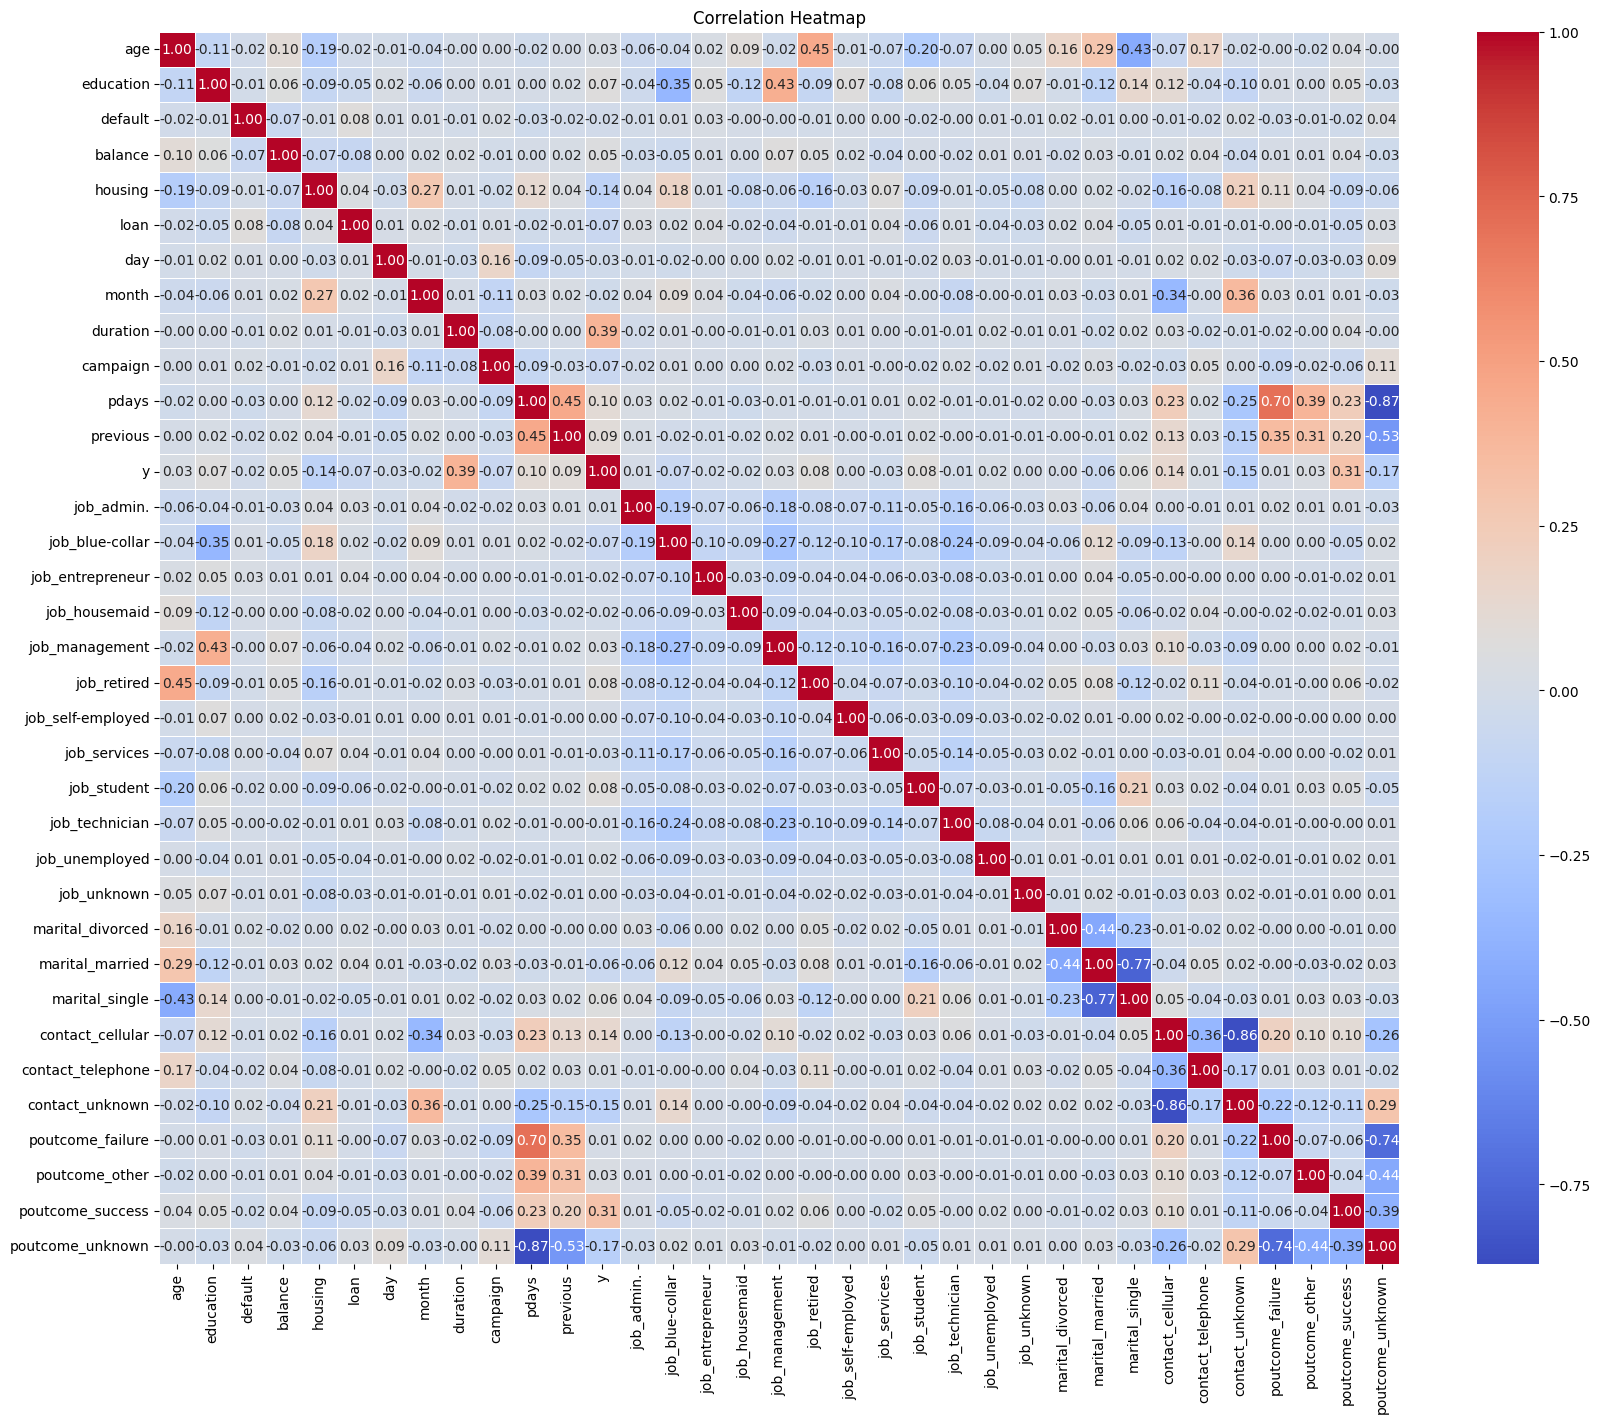

In [ ]:
# plot Correlation Heatmap

# Compute correlation matrix
corr_matrix = banking_marketing_train_encoded.corr()

# Plot heatmap
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

# association with y
# > 0.1, duration, pdays, contact_cellular,poutcome_success,poutcome_other
# negative, housing, contact_unknown, poutcome_unknown
# 0, job = self-employed

# association with poutcome-success
# > 0.1, pdays, previous, contact_cellular
# negative, contact_unknown

pdays and y

In [111]:
print('-1 \n')
print(banking_marketing_train_encoded[banking_marketing_train_encoded['pdays']==-1]['y'].value_counts())
print('182 \n')
print(banking_marketing_train_encoded[banking_marketing_train_encoded['pdays']==182]['y'].value_counts())
print('92 \n')
print(banking_marketing_train_encoded[banking_marketing_train_encoded['pdays']==92]['y'].value_counts())
print('91 \n')
print(banking_marketing_train_encoded[banking_marketing_train_encoded['pdays']==91]['y'].value_counts())
print('183 \n')
print(banking_marketing_train_encoded[banking_marketing_train_encoded['pdays']==183]['y'].value_counts())

-1 

0    33570
1     3384
Name: y, dtype: int64
182 

0    87
1    80
Name: y, dtype: int64
92 

1    96
0    51
Name: y, dtype: int64
91 

1    75
0    51
Name: y, dtype: int64
183 

1    64
0    62
Name: y, dtype: int64


0    6352
1    1905
Name: y, dtype: int64


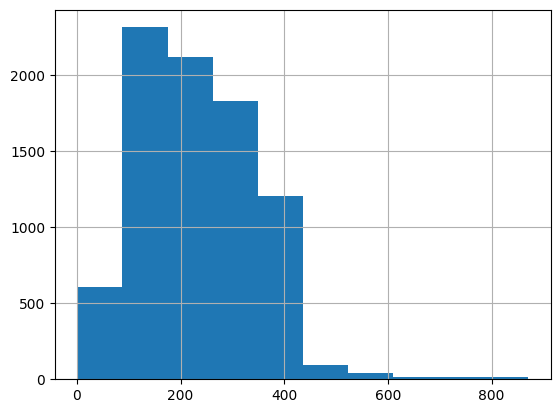

In [107]:
filtered_train = banking_marketing_train_encoded[banking_marketing_train_encoded['pdays']!=-1]
print(filtered_train['y'].value_counts())
# if not previously contacted, much higher probability of failure

filtered_train['pdays'].hist()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


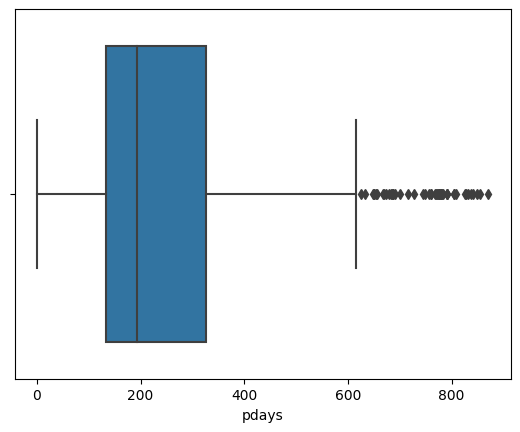

In [92]:
sns.boxplot(filtered_train['pdays'])
plt.show()

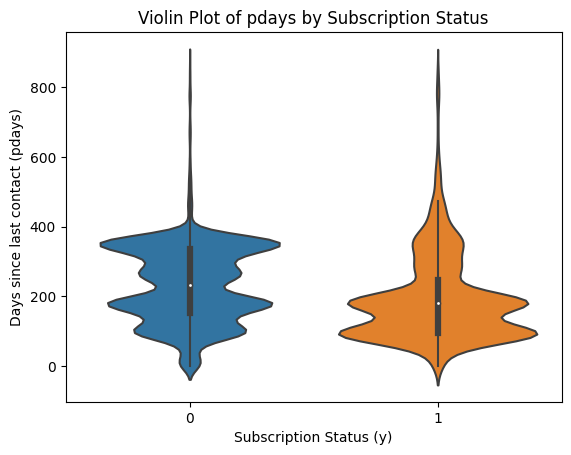

In [ ]:
# Create a violin plot for duration and y
sns.violinplot(x='y', y='pdays', data=filtered_train)
plt.title('Violin Plot of pdays by Subscription Status')
plt.xlabel('Subscription Status (y)')
plt.ylabel('Days since last contact (pdays)')
plt.show()


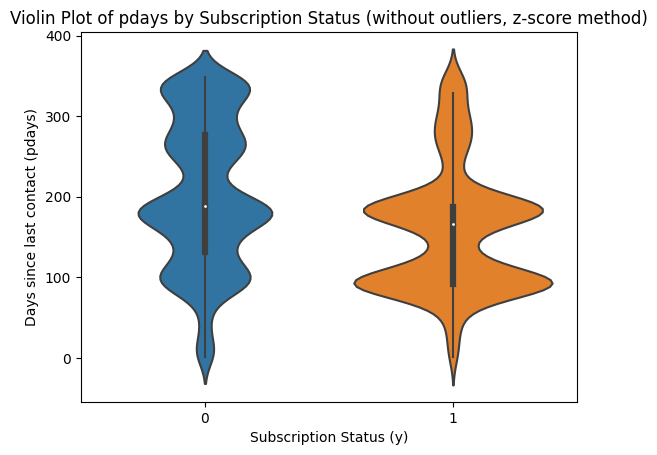

In [104]:
from scipy.stats import zscore

# Filter out rows where the z-score is greater than 3 or less than -3 (common threshold for outliers)
banking_marketing_train_no_outliers_zscore = filtered_train[filtered_train['pdays']<350]

# Plot the violin plot for 'pdays' without outliers using z-score
sns.violinplot(x='y', y='pdays', data=banking_marketing_train_no_outliers_zscore)
plt.title('Violin Plot of pdays by Subscription Status (without outliers, z-score method)')
plt.xlabel('Subscription Status (y)')
plt.ylabel('Days since last contact (pdays)')
plt.show()


the plot shows that smaller pdays -> higher succes rate


In [113]:
# duration with y
banking_marketing_train_encoded['duration'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


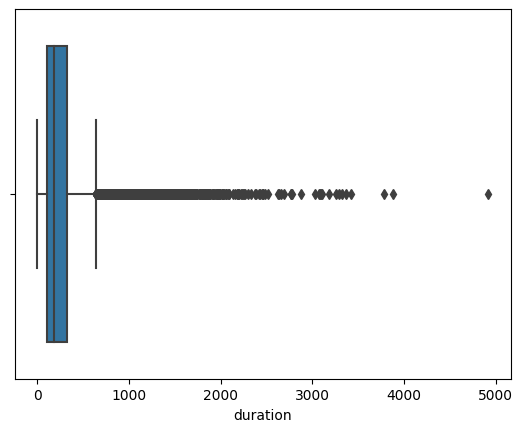

In [114]:
sns.boxplot(banking_marketing_train_encoded['duration'])
plt.show()

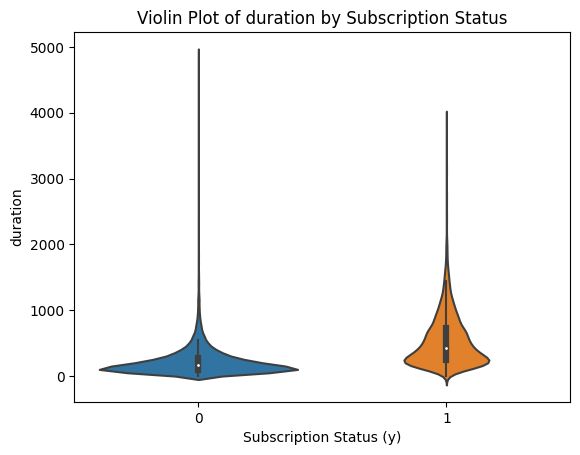

In [115]:
# Create a violin plot for duration and y
sns.violinplot(x='y', y='duration', data=banking_marketing_train_encoded)
plt.title('Violin Plot of duration by Subscription Status')
plt.xlabel('Subscription Status (y)')
plt.ylabel('duration')
plt.show()


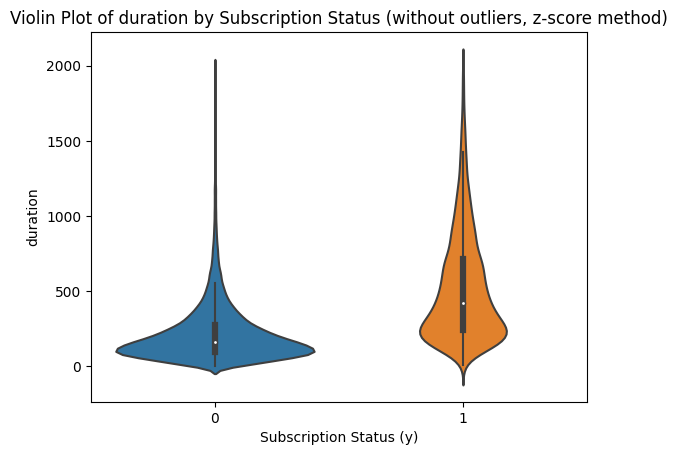

In [116]:

# Filter out rows where the z-score is greater than 3 or less than -3 (common threshold for outliers)
banking_marketing_train_no_outliers_zscore = banking_marketing_train_encoded[banking_marketing_train_encoded['duration']<2000]

# Plot the violin plot for 'pdays' without outliers using z-score
sns.violinplot(x='y', y='duration', data=banking_marketing_train_no_outliers_zscore)
plt.title('Violin Plot of duration by Subscription Status (without outliers, z-score method)')
plt.xlabel('Subscription Status (y)')
plt.ylabel('duration')
plt.show()


smaller duration -> low success rate

In [117]:
# previous and y
banking_marketing_train_encoded['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [123]:
print(banking_marketing_train_encoded[banking_marketing_train_encoded['previous']==0]['y'].value_counts())

print(banking_marketing_train_encoded[banking_marketing_train_encoded['previous']==1]['y'].value_counts())
print(banking_marketing_train_encoded[banking_marketing_train_encoded['previous']==2]['y'].value_counts())
print(banking_marketing_train_encoded[banking_marketing_train_encoded['previous']==3]['y'].value_counts())

0    33570
1     3384
Name: y, dtype: int64
0    2189
1     583
Name: y, dtype: int64
0    1650
1     456
Name: y, dtype: int64
0    848
1    294
Name: y, dtype: int64


0    6352
1    1905
Name: y, dtype: int64


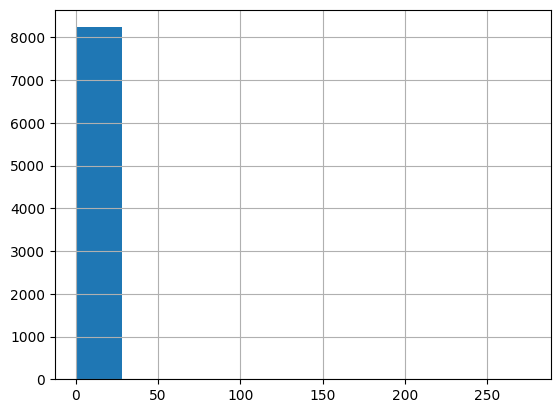

In [125]:
filtered_train = banking_marketing_train_encoded[banking_marketing_train_encoded['previous']!=0]
print(filtered_train['y'].value_counts())
# if not previously contacted, much higher probability of failure

filtered_train['previous'].hist()
plt.show()


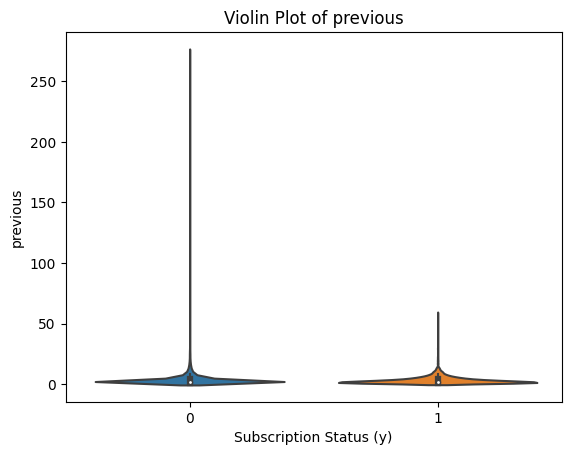

In [126]:
# Create a violin plot for duration and y
sns.violinplot(x='y', y='previous', data=filtered_train)
plt.title('Violin Plot of previous')
plt.xlabel('Subscription Status (y)')
plt.ylabel('previous')
plt.show()


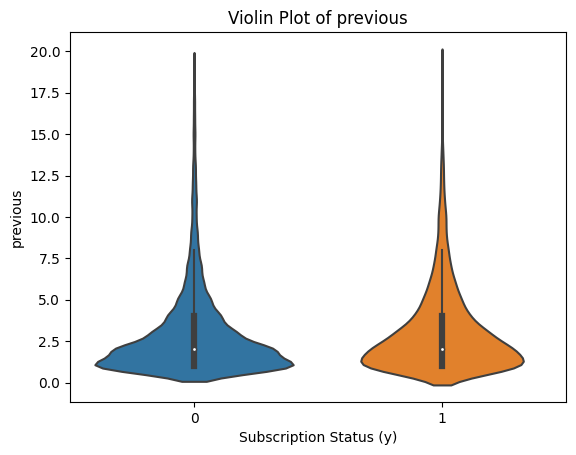

In [127]:
from scipy.stats import zscore

# Filter out rows where the z-score is greater than 3 or less than -3 (common threshold for outliers)
banking_marketing_train_no_outliers_zscore = filtered_train[filtered_train['previous']<20]

# Plot the violin plot for 'pdays' without outliers using z-score
sns.violinplot(x='y', y='previous', data=banking_marketing_train_no_outliers_zscore)
plt.title('Violin Plot of previous')
plt.xlabel('Subscription Status (y)')
plt.ylabel('previous')
plt.show()


In [128]:
# housing and y
banking_marketing_train_encoded['housing'].value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [131]:

# Assuming 'loan' and 'y' are the two binary columns in the DataFrame
contingency_table = pd.crosstab(banking_marketing_train_encoded['housing'], banking_marketing_train_encoded['y'])

# Display the contingency table
print(contingency_table)


y            0     1
housing             
0        16727  3354
1        23195  1935


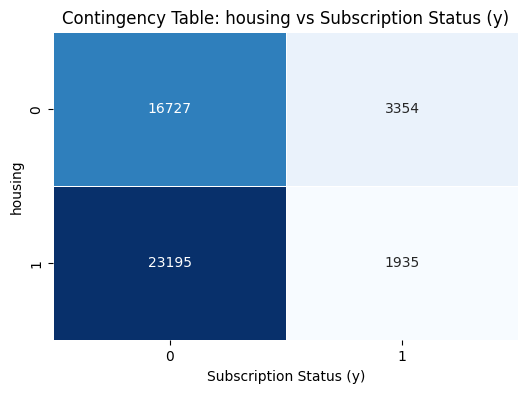

In [133]:

# Plotting the heatmap for the contingency table
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5)
plt.title('Contingency Table: housing vs Subscription Status (y)')
plt.xlabel('Subscription Status (y)')
plt.ylabel('housing')
plt.show()


has housing loan -> low success rate

feature engineering - create new features

In [ ]:
# cost
